## Task 2 : Prediction using Unsupervised ML 
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Bhushan Hinduja

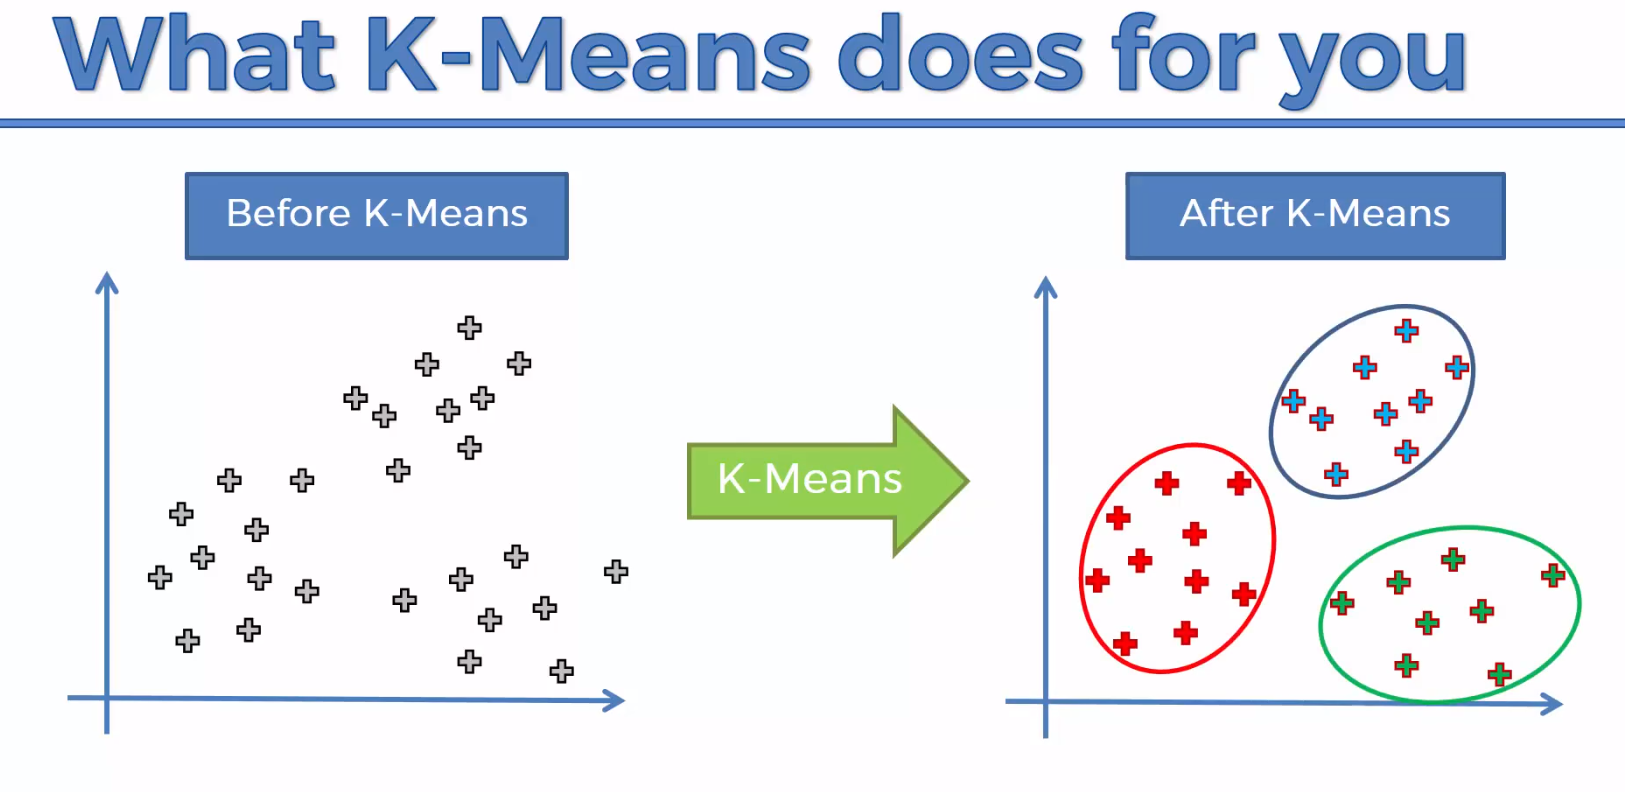

### 1. Reading the given dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
iris=pd.read_csv("iris.csv")

### 2. Analysis of the Data

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.duplicated().sum()

0

In [7]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### As there are no duplicate records and no null values, there is no need to clean the data.

### 3. Preparing the data

In [8]:
x=iris.iloc[:,1:-1].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### 4. Applying the elbow method

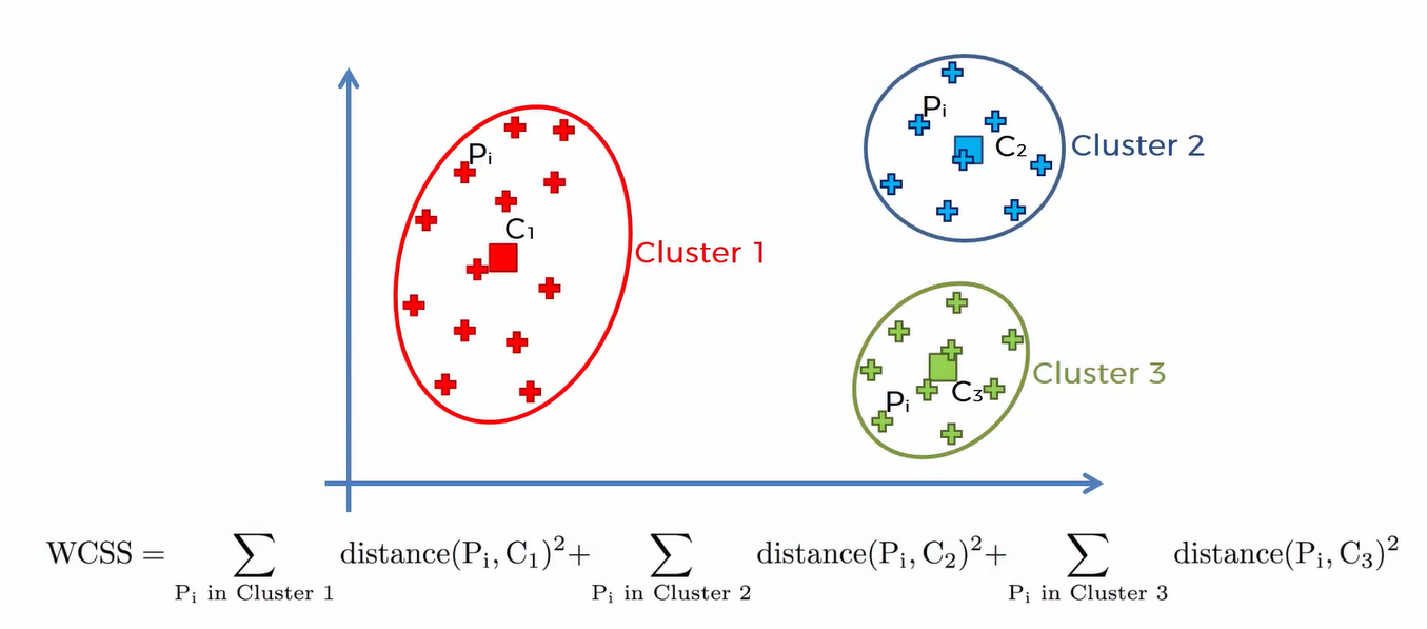

The graph is as follows:


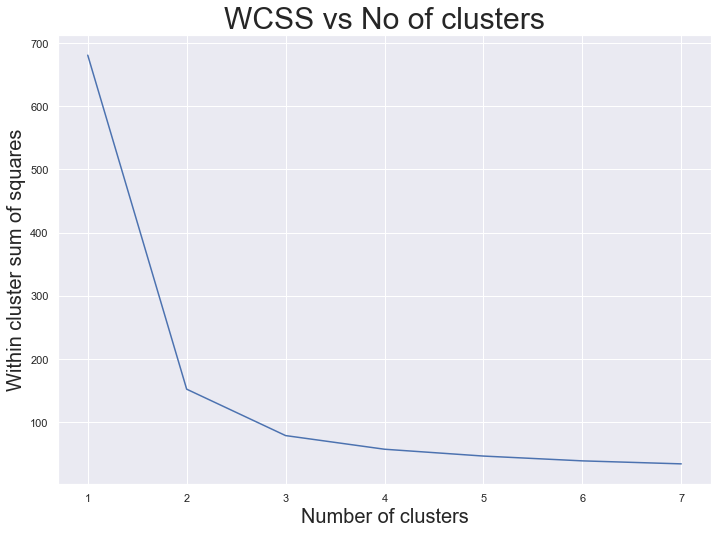

In [9]:
wcss=[]
from sklearn.cluster import KMeans
for i in range(1,8):
    k=KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    k.fit(x)
    wcss.append(k.inertia_)
    
p=sns.lineplot(x=range(1,8),y=wcss,)
p.set_xlabel("Number of clusters", fontsize=20)
p.set_ylabel("Within cluster sum of squares", fontsize=20)
p.set_title('WCSS vs No of clusters', fontsize=30)
print("The graph is as follows:")

### The WCSS value decreases gradually after three clusters, hence the best option would be to take 
### Number of clusters = 3

### 5. Constructing the model

In [10]:
k1=KMeans(n_clusters=3, init="k-means++", random_state=0, n_init=10 )
y=k1.fit_predict(x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [11]:
len(y)

150

###  6. Visualizing the clusters formed

Text(0.5, 1.0, 'Clusters formed using K-means')

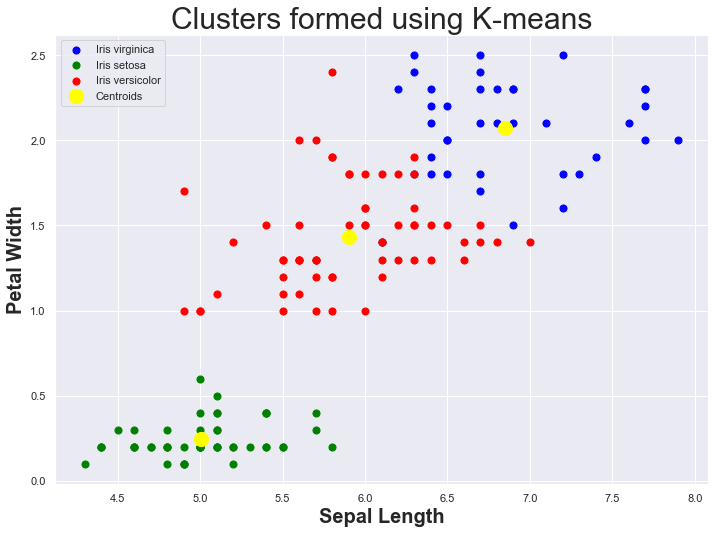

In [12]:
plt.scatter(x=x[y==0, 0], y=x[y==0, 3], s=50 , label="Iris virginica",c="blue")
plt.scatter(x=x[y==1, 0], y=x[y==1, 3], s=50, label="Iris setosa",c="green")
plt.scatter(x=x[y==2, 0], y=x[y==2, 3], s=50, label="Iris versicolor", c="red")
plt.scatter(x= k1.cluster_centers_[:,0], y=k1.cluster_centers_[:, 3], s=200, label="Centroids", c="yellow")
plt.legend()
plt.xlabel("Sepal Length", fontweight='bold', fontsize=20)
plt.ylabel("Petal Width", fontweight='bold', fontsize=20)
plt.title("Clusters formed using K-means", fontsize=30)

### 7. Predicting the cluster for a new data point

In [13]:
sLen=7.2
sWid=3.0
pLen=5.7
pWid=2.0

y1=k1.predict([[sLen,sWid,pLen,pWid]]) #predicting the cluster for the new data point

Text(0, 0.5, 'Petal Width')

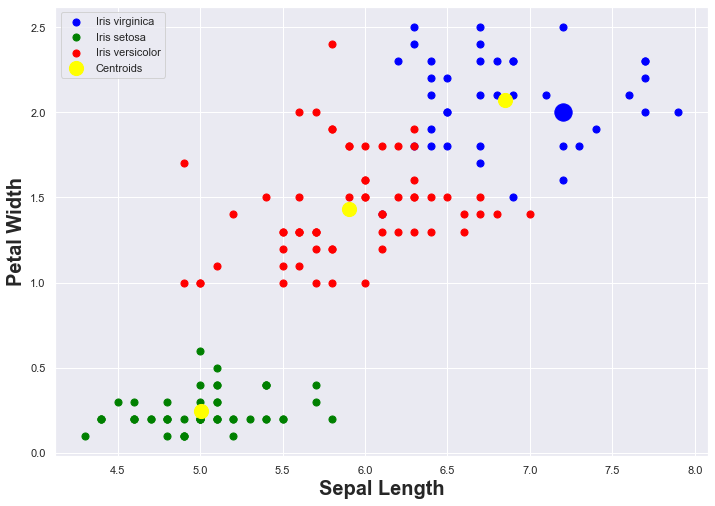

In [14]:
col=""
if(y1==0):
    col="blue"
elif(y1==1):
    col="green"
elif(y1==2):
    col="red"

plt.scatter(x=x[y==0, 0], y=x[y==0, 3], s=50 , label="Iris virginica",c="blue")
plt.scatter(x=x[y==1, 0], y=x[y==1, 3], s=50, label="Iris setosa",c="green")
plt.scatter(x=x[y==2, 0], y=x[y==2, 3], s=50, label="Iris versicolor", c="red")
plt.scatter(x= k1.cluster_centers_[:,0], y=k1.cluster_centers_[:, 3], s=200, label="Centroids", c="yellow")

plt.scatter(x=sLen, y=pWid, c=col,s=300)  # plotting new data point

plt.legend()
plt.xlabel("Sepal Length", fontweight='bold', fontsize=20)
plt.ylabel("Petal Width", fontweight='bold', fontsize=20)

### By using K- means, we could predict the cluster for the new data point , which is Iris virginica.

# *THANK YOU!*